In [1]:
from nltk.corpus import names
import nltk
import re
import random
import numpy as np

In [2]:
names = ([(name, 'male') for name in names.words('male.txt')] + 
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [3]:
def last_syllable(word):
    word=word.lower()
    if len(word) < 3: 
        return {'feature': word}
    else: 
        pattern=r'(?:[^aeiouy][*aeiouy][^aeiouy]e$)|(?:[^aeiouy][*aeiouy]*[^aeiouy]*$)'
        return {'feature': re.findall(pattern, word)[0]}

In [4]:
word='Peter'

pattern=r'(?:[^aeiouy][*aeiouy][^aeiouy]e$)|(?:[^aeiouy][*aeiouy]*[^aeiouy]*$)'
re.findall(pattern, word)[0]

'ter'

In [5]:
last_syllable("Trinity")

{'feature': 'ty'}

In [6]:
featuresets = [(last_syllable(n), g) for n, g in names]
train_set, test_set = featuresets[200:], featuresets[:200]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [7]:
classifier.prob_classify(last_syllable('Esther')).prob('female')

0.3002869618251314

In [8]:
features = {f['feature'] for f, g in train_set}
len(features)

1567

In [9]:
len(names)

7944

In [10]:
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [True if a == 'female' else False for _, a in test_set]

In [11]:
labels[:10]

[True, True, False, True, False, True, True, True, False, False]

In [12]:
def get_probs(fun):

    featuresets = [(fun(n), g) for n, g in names]
    train_set, test_set = featuresets[2000:], featuresets[:2000]

    classifier = nltk.NaiveBayesClassifier.train(train_set)
    
    global labels
    labels = [True if a == 'female' else False for _, a in test_set]
    
    return [classifier.prob_classify(a).prob('female') for a, b in test_set]

In [13]:
def last_letter(word):
    return {'feature': word[-1]}

In [14]:
def first_last_letter(word):
    return {'first': word[0], 'last': word[-1]}

In [15]:
def vowels_ratio(word):
    word=word.lower()
    return {'feature': len(re.sub('[^aeiouy]*', '', word)) / len(word)} 

$$P(label|featureS) \propto P(featureS|labels) P(label)$$

$$P(featureS|labels) = P(feature 1|labels) \cdot\dots\cdot P(feature n|labels)$$

In [16]:
def consonants_vowels(word):
    word=word.lower()
    return {'vowels': len(re.sub('[^aeiouy]*', '', word)), 
            'conson': len(re.sub('[aeiouy]*', '', word))} 

In [26]:
consonants_vowels('Peter')

{'vowels': 2, 'conson': 3}

In [22]:
p_last_syllable=get_probs(last_syllable)
p_last_letter=get_probs(last_letter)

In [23]:
p_first_last_letter=get_probs(first_last_letter)
p_consonants_vowels=get_probs(consonants_vowels)

p_vowels_ratio=get_probs(vowels_ratio)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

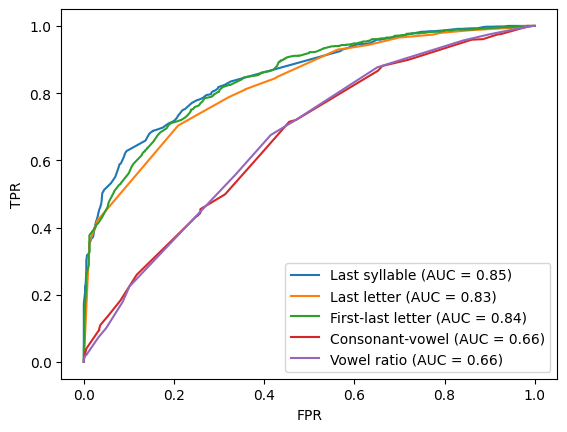

In [25]:
fpr, tpr, thresholds = roc_curve(labels, p_last_syllable)
auc = roc_auc_score(labels, p_last_syllable)
plt.plot(fpr, tpr, label=f'Last syllable (AUC = {auc:.2f})')

fpr, tpr, thresholds = roc_curve(labels, p_last_letter)
auc = roc_auc_score(labels, p_last_letter)
plt.plot(fpr, tpr, label=f'Last letter (AUC = {auc:.2f})')


fpr, tpr, thresholds = roc_curve(labels, p_first_last_letter)
auc = roc_auc_score(labels, p_first_last_letter)
plt.plot(fpr, tpr, label=f'First-last letter (AUC = {auc:.2f})')

fpr, tpr, thresholds = roc_curve(labels, p_consonants_vowels)
auc = roc_auc_score(labels, p_consonants_vowels)
plt.plot(fpr, tpr, label=f'Consonant-vowel (AUC = {auc:.2f})')

fpr, tpr, thresholds = roc_curve(labels, p_vowels_ratio)
auc = roc_auc_score(labels, p_vowels_ratio)
plt.plot(fpr, tpr, label=f'Vowel ratio (AUC = {auc:.2f})')

# Set plot labels and title
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()